# Data Preparation for Fraud Detection

This notebook demonstrates the data preparation phase of our MLOps fraud detection pipeline. We'll generate synthetic transaction data, explore its characteristics, and prepare it for machine learning model training.

## Objectives

1. Generate synthetic transaction data using our custom data generator
2. Explore and understand the dataset structure and patterns
3. Analyze fraud vs normal transaction characteristics
4. Visualize key patterns in the data
5. Assess data quality and prepare for feature engineering
6. Save processed data for subsequent modeling steps

This notebook follows MLOps best practices by ensuring reproducibility, thorough documentation, and proper data validation.

## Learning Objectives

- Understand how the shared pipeline generates and validates the fraud dataset
- Inspect key data quality checks before moving to feature engineering
- Capture assets (raw, clean, engineered) that other notebooks will reuse


## 1. Import Required Libraries

We'll start by importing all necessary libraries for data generation, analysis, and visualization.

In [19]:
# Standard library imports
import sys
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

PROJECT_ROOT = Path.cwd().parent
if str(PROJECT_ROOT) not in sys.path:
    sys.path.append(str(PROJECT_ROOT))

# Third-party libraries
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Project modules
from src.config import ConfigManager
from src.pipelines import run_data_preparation


## 2. Load Configuration and Setup

Load project configuration and set up logging for the data preparation process.

In [20]:
config_manager = ConfigManager()
config = config_manager.get_training_config()
print('Configuration loaded:')
print(f"  - Training samples: {config['data']['n_samples']:,}")
print(f"  - Fraud rate: {config['data']['fraud_rate']:.1%}")
print(f"  - Random seed: {config['data']['random_state']}")

Configuration loaded:
  - Training samples: 20,000
  - Fraud rate: 2.0%
  - Random seed: 42


## 3. Generate Synthetic Transaction Data

Using our custom `TransactionDataGenerator`, we'll create a realistic dataset of financial transactions with embedded fraud patterns.

In [21]:
# Run the reusable data preparation pipeline
data_outputs = run_data_preparation(config, regenerate_data=False, persist=False)

df = data_outputs['raw']
clean_df = data_outputs['clean']
features_df = data_outputs['features']
print(f"Raw dataset shape: {df.shape}")
print(f"Cleaned dataset shape: {clean_df.shape}")
print(f"Engineered dataset features: {len(data_outputs['feature_names'])}")


Raw dataset shape: (100000, 20)
Cleaned dataset shape: (100000, 20)
Engineered dataset features: 52


## 4. Explore Dataset Structure and Statistics

Let's examine the structure of our generated dataset and understand the characteristics of each feature.

In [22]:
# Display first few rows
print("First 5 rows of the dataset:")
display(df.head())

print("\n" + "="*80)

# Dataset info
print("Dataset Information:")
print(df.info())

print("\n" + "="*80)

# Data types summary
print("Column Data Types:")
dtype_summary = df.dtypes.value_counts()
for dtype, count in dtype_summary.items():
    print(f"   - {dtype}: {count} columns")

print("\n" + "="*80)

# Check for missing values
print("Missing Values Analysis:")
missing_data = df.isnull().sum()
if missing_data.sum() == 0:
    print("   No missing values found in the dataset!")
else:
    print("   Missing values per column:")
    for col, missing_count in missing_data[missing_data > 0].items():
        print(f"   - {col}: {missing_count} ({missing_count/len(df)*100:.2f}%)")

print("\n" + "="*80)

# Basic statistics for numerical columns
print("Statistical Summary for Numerical Columns:")
numerical_cols = df.select_dtypes(include=[np.number]).columns
display(df[numerical_cols].describe())

First 5 rows of the dataset:


,transaction_id,user_id,timestamp,amount,merchant_category,transaction_type,device_id,device_type,location,hour_of_day,day_of_week,is_weekend,is_fraud,user_transaction_count,user_avg_amount,user_std_amount,user_unique_categories,user_unique_devices,user_unique_locations,amount_zscore
0,txn_00069294,user_002061,2025-07-01 21:53:30.216287,24.26,pharmacy,transfer,device_user_002061_1,desktop,Los Angeles,6,1,False,False,9,58.870000,53.704080,7,3,3,-0.632677
1,txn_00072682,user_004376,2025-07-01 21:54:30.216287,29.56,travel,transfer,device_user_004376_2,pos_terminal,Phoenix,6,1,False,False,12,50.828333,47.640222,7,3,5,-0.437258
2,txn_00020431,user_005938,2025-07-01 21:57:30.216287,74.07,grocery,purchase,device_user_005938_3,pos_terminal,Chicago,6,1,False,False,7,92.775714,133.281958,4,3,4,-0.139302
3,txn_00041097,user_007163,2025-07-01 21:57:30.216287,16.66,online,withdrawal,device_user_007163_2,mobile,New York,6,1,False,False,13,40.325220,57.204413,9,2,4,-0.406588
4,txn_00092827,user_002511,2025-07-01 21:58:30.216287,16.68,gas_station,purchase,device_user_002511_1,tablet,Chicago,6,1,False,False,11,62.689442,62.395360,6,3,5,-0.725754



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   transaction_id          100000 non-null  object        
 1   user_id                 100000 non-null  object        
 2   timestamp               100000 non-null  datetime64[ns]
 3   amount                  100000 non-null  float64       
 4   merchant_category       100000 non-null  object        
 5   transaction_type        100000 non-null  object        
 6   device_id               100000 non-null  object        
 7   device_type             100000 non-null  object        
 8   location                100000 non-null  object        
 9   hour_of_day             100000 non-null  int64         
 10  day_of_week             100000 non-null  int64         
 11  is_weekend              100000 non-null  bool          
 12  is_fraud 

,amount,hour_of_day,day_of_week,user_transaction_count,user_avg_amount,user_std_amount,user_unique_categories,user_unique_devices,user_unique_locations,amount_zscore
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05
mean,70.332144,13.837480,3.023820,11.013580,70.332144,91.214830,6.688310,2.629000,4.457350,6.252776e-18
std,127.537714,5.071618,1.998898,3.173694,40.157959,89.160265,1.448786,0.504957,0.688437,9.317341e-01
min,1.000000,1.000000,0.000000,1.000000,2.120000,0.000000,1.000000,1.000000,1.000000,-2.041292e+00
25%,14.860000,10.000000,1.000000,9.000000,44.982514,42.426220,6.000000,2.000000,4.000000,-6.001294e-01
50%,33.880000,14.000000,3.000000,11.000000,60.950572,66.726660,7.000000,3.000000,5.000000,-3.448185e-01
75%,76.182500,18.000000,5.000000,13.000000,84.726364,108.133505,8.000000,3.000000,5.000000,2.854932e-01
max,8379.210000,23.000000,6.000000,25.000000,1001.991111,2767.921705,10.000000,3.000000,5.000000,4.283486e+00


In [23]:
# Analyze categorical columns
print("Categorical Columns Analysis:")

categorical_cols = ['merchant_category', 'transaction_type', 'device_type', 'location']

for col in categorical_cols:
    if col in df.columns:
        print(f"\n{col.upper().replace('_', ' ')}:")
        value_counts = df[col].value_counts()
        print(f"   - Unique values: {df[col].nunique()}")
        print(f"   - Top 5 values:")
        for value, count in value_counts.head().items():
            percentage = count / len(df) * 100
            print(f"     * {value}: {count:,} ({percentage:.1f}%)")

print("\n" + "="*80)

# User behavior summary
print("User Behavior Summary:")
user_summary = df.groupby('user_id').agg({
    'transaction_id': 'count',
    'amount': ['sum', 'mean'],
    'is_fraud': 'sum'
}).round(2)

user_summary.columns = ['transaction_count', 'total_amount', 'avg_amount', 'fraud_count']
user_summary['fraud_rate'] = (user_summary['fraud_count'] / user_summary['transaction_count']).round(3)

print(f"   - Average transactions per user: {user_summary['transaction_count'].mean():.1f}")
print(f"   - Average spending per user: ${user_summary['total_amount'].mean():,.2f}")
print(f"   - Users with fraudulent transactions: {(user_summary['fraud_count'] > 0).sum():,}")
print(f"   - Average fraud rate per user: {user_summary['fraud_rate'].mean():.3f}")

display(user_summary.describe())

Categorical Columns Analysis:

MERCHANT CATEGORY:
   - Unique values: 10
   - Top 5 values:
     * travel: 10,109 (10.1%)
     * retail: 10,071 (10.1%)
     * entertainment: 10,034 (10.0%)
     * online: 10,029 (10.0%)
     * restaurant: 10,028 (10.0%)

TRANSACTION TYPE:
   - Unique values: 5
   - Top 5 values:
     * purchase: 70,171 (70.2%)
     * transfer: 10,051 (10.1%)
     * withdrawal: 10,001 (10.0%)
     * payment: 7,783 (7.8%)
     * refund: 1,994 (2.0%)

DEVICE TYPE:
   - Unique values: 5
   - Top 5 values:
     * mobile: 40,050 (40.1%)
     * desktop: 29,870 (29.9%)
     * pos_terminal: 15,020 (15.0%)
     * tablet: 10,048 (10.0%)
     * atm: 5,012 (5.0%)

LOCATION:
   - Unique values: 5
   - Top 5 values:
     * Chicago: 20,061 (20.1%)
     * Houston: 20,015 (20.0%)
     * Los Angeles: 19,999 (20.0%)
     * New York: 19,998 (20.0%)
     * Phoenix: 19,927 (19.9%)

User Behavior Summary:
   - Average transactions per user: 10.0
   - Average spending per user: $703.46
   - Use

,transaction_count,total_amount,avg_amount,fraud_count,fraud_rate
count,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000
mean,10.002000,703.462154,70.112203,0.200040,0.019859
std,3.181011,465.320578,42.244117,0.451058,0.046582
min,1.000000,2.120000,2.120000,0.000000,0.000000
25%,8.000000,391.612500,43.820000,0.000000,0.000000
50%,10.000000,602.695000,60.165000,0.000000,0.000000
75%,12.000000,896.782500,84.745000,0.000000,0.000000
max,25.000000,9017.920000,1001.990000,4.000000,0.500000


## 5. Analyze Fraud vs Normal Transaction Patterns

Now let's dive deeper into understanding how fraudulent transactions differ from normal ones across various dimensions.

In [24]:
# Separate fraud and normal transactions
fraud_df = df[df['is_fraud'] == True]
normal_df = df[df['is_fraud'] == False]

print("Fraud vs Normal Transaction Analysis:")
print(f"   - Fraudulent transactions: {len(fraud_df):,}")
print(f"   - Normal transactions: {len(normal_df):,}")

print("\n" + "="*80)

# Amount analysis
print("AMOUNT ANALYSIS:")
print(f"Fraud transactions:")
print(f"   - Mean amount: ${fraud_df['amount'].mean():,.2f}")
print(f"   - Median amount: ${fraud_df['amount'].median():,.2f}")
print(f"   - Std deviation: ${fraud_df['amount'].std():,.2f}")

print(f"\nNormal transactions:")
print(f"   - Mean amount: ${normal_df['amount'].mean():,.2f}")
print(f"   - Median amount: ${normal_df['amount'].median():,.2f}")
print(f"   - Std deviation: ${normal_df['amount'].std():,.2f}")

# Statistical significance test
from scipy.stats import mannwhitneyu
statistic, p_value = mannwhitneyu(fraud_df['amount'], normal_df['amount'], alternative='two-sided')
print(f"\nMann-Whitney U test p-value: {p_value:.2e}")
print("(Testing if fraud and normal amounts come from different distributions)")

print("\n" + "="*80)

# Time pattern analysis
print("TIME PATTERN ANALYSIS:")

print("\nHour of day distribution:")
fraud_hours = fraud_df['hour_of_day'].value_counts().sort_index()
normal_hours = normal_df['hour_of_day'].value_counts().sort_index()

print("Top fraud hours:")
fraud_hour_pct = (fraud_hours / fraud_hours.sum() * 100).round(1)
for hour in fraud_hour_pct.nlargest(5).index:
    print(f"   - {hour:02d}:00 - {fraud_hour_pct[hour]:.1f}% of fraud transactions")

Fraud vs Normal Transaction Analysis:
   - Fraudulent transactions: 2,000
   - Normal transactions: 98,000

AMOUNT ANALYSIS:
Fraud transactions:
   - Mean amount: $153.07
   - Median amount: $72.88
   - Std deviation: $253.13

Normal transactions:
   - Mean amount: $68.64
   - Median amount: $33.38
   - Std deviation: $123.08

Mann-Whitney U test p-value: 5.19e-163
(Testing if fraud and normal amounts come from different distributions)

TIME PATTERN ANALYSIS:

Hour of day distribution:
Top fraud hours:
   - 23:00 - 17.6% of fraud transactions
   - 01:00 - 17.2% of fraud transactions
   - 04:00 - 17.0% of fraud transactions
   - 03:00 - 16.8% of fraud transactions
   - 05:00 - 16.0% of fraud transactions


In [25]:
# Categorical patterns analysis
print("CATEGORICAL PATTERNS ANALYSIS:")

categorical_cols = ['merchant_category', 'transaction_type', 'device_type', 'location']

for col in categorical_cols:
    if col in df.columns:
        print(f" {col.upper().replace('_', ' ')} DISTRIBUTION:")
        
        # Create cross-tabulation
        crosstab = pd.crosstab(df[col], df['is_fraud'], normalize='columns') * 100
        
        if True in crosstab.columns and False in crosstab.columns:
            # Calculate difference between fraud and normal rates
            crosstab['fraud_vs_normal_diff'] = crosstab[True] - crosstab[False]
            
            print("   Categories with highest fraud concentration:")
            top_fraud_categories = crosstab.nlargest(3, 'fraud_vs_normal_diff')
            for category in top_fraud_categories.index:
                fraud_pct = crosstab.loc[category, True]
                normal_pct = crosstab.loc[category, False]
                diff = crosstab.loc[category, 'fraud_vs_normal_diff']
                print(f"     - {category}: {fraud_pct:.1f}% fraud vs {normal_pct:.1f}% normal (diff: +{diff:.1f}%)")

print("USER BEHAVIOR PATTERNS:")

# Analyze user-level features
user_behavior_cols = ['user_transaction_count', 'user_avg_amount', 'user_unique_categories', 
                      'user_unique_devices', 'user_unique_locations']

for col in user_behavior_cols:
    if col in df.columns:
        fraud_mean = fraud_df[col].mean()
        normal_mean = normal_df[col].mean()
        print(f"{col.replace('_', ' ').title()}:")
        print(f"   - Fraud avg: {fraud_mean:.2f}")
        print(f"   - Normal avg: {normal_mean:.2f}")
        print(f"   - Difference: {fraud_mean - normal_mean:+.2f}")

CATEGORICAL PATTERNS ANALYSIS:
 MERCHANT CATEGORY DISTRIBUTION:
   Categories with highest fraud concentration:
     - online: 11.2% fraud vs 10.0% normal (diff: +1.2%)
     - restaurant: 10.7% fraud vs 10.0% normal (diff: +0.7%)
     - utilities: 10.3% fraud vs 9.9% normal (diff: +0.4%)
 TRANSACTION TYPE DISTRIBUTION:
   Categories with highest fraud concentration:
     - purchase: 70.9% fraud vs 70.2% normal (diff: +0.7%)
     - refund: 2.3% fraud vs 2.0% normal (diff: +0.3%)
     - payment: 7.8% fraud vs 7.8% normal (diff: +0.1%)
 DEVICE TYPE DISTRIBUTION:
   Categories with highest fraud concentration:
     - mobile: 42.1% fraud vs 40.0% normal (diff: +2.1%)
     - desktop: 29.9% fraud vs 29.9% normal (diff: +0.0%)
     - atm: 4.7% fraud vs 5.0% normal (diff: +-0.3%)
 LOCATION DISTRIBUTION:
   Categories with highest fraud concentration:
     - Chicago: 20.5% fraud vs 20.1% normal (diff: +0.4%)
     - Phoenix: 20.1% fraud vs 19.9% normal (diff: +0.2%)
     - Los Angeles: 20.0% frau

## 6. Visualize Transaction Distributions

Let's create comprehensive visualizations to better understand the patterns in our data.

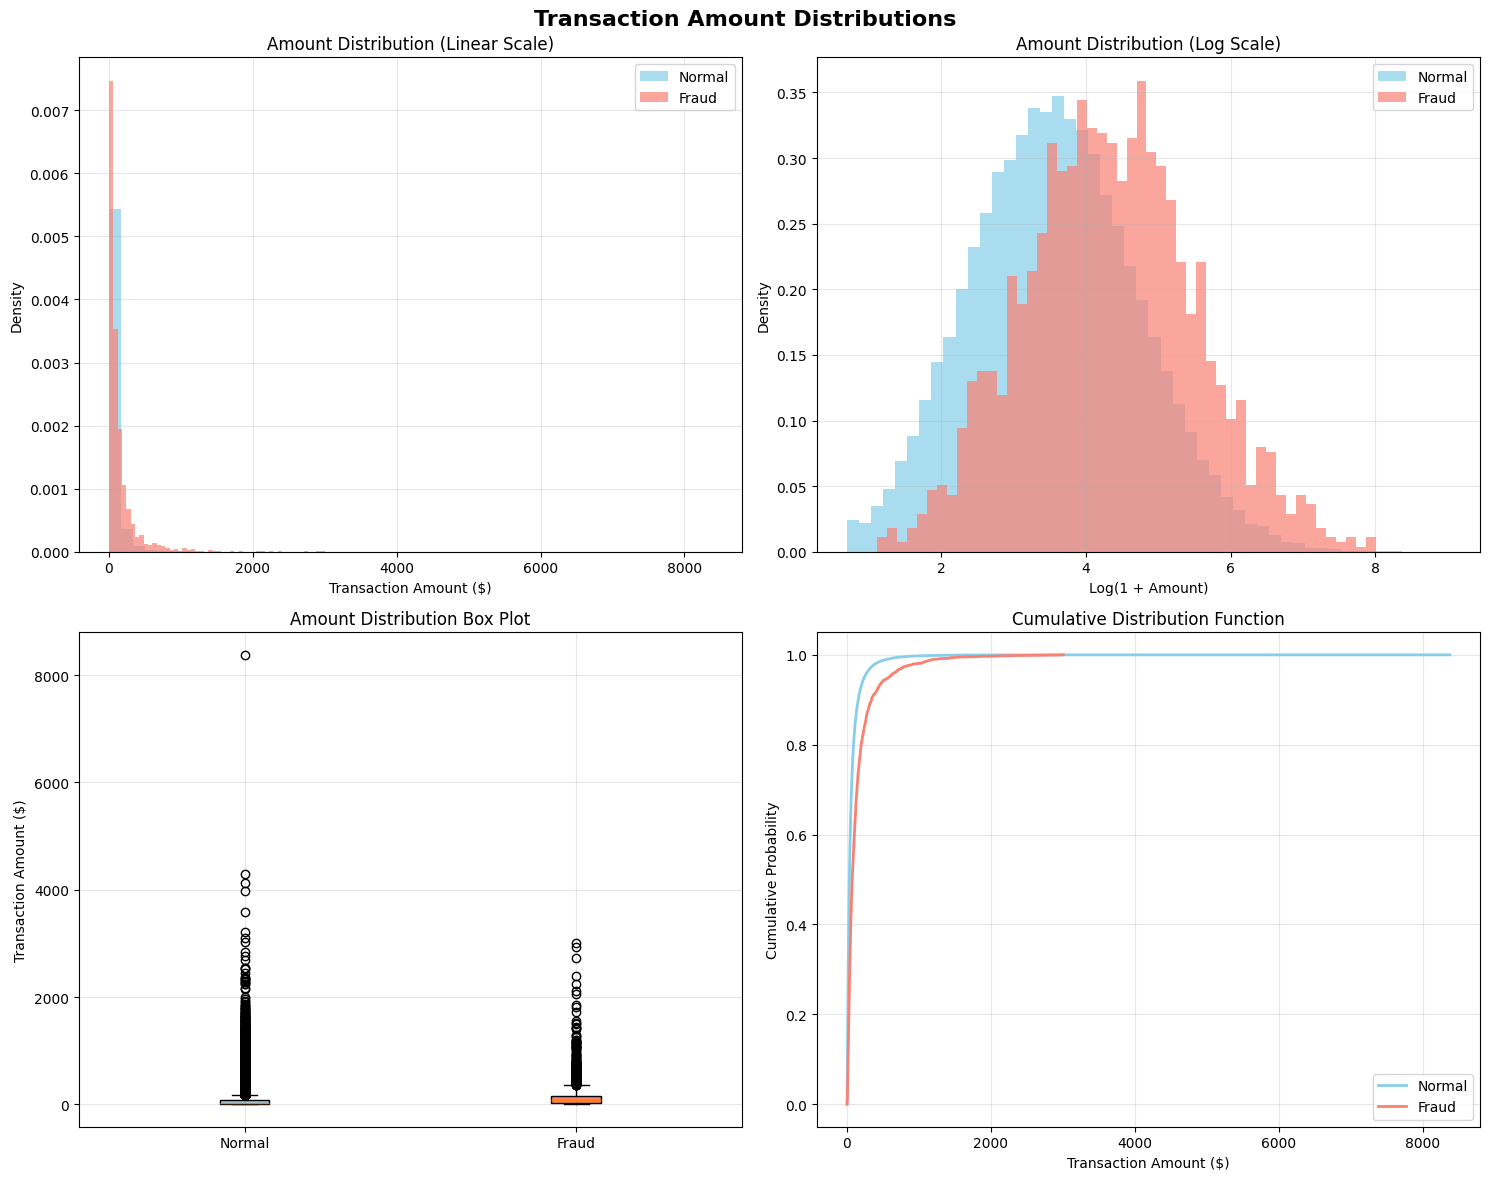

MONEY Amount Statistics Summary:
Normal transactions - Mean: $68.64, Median: $33.38
Fraud transactions - Mean: $153.07, Median: $72.88
Fraud amount is 2.2x higher on average


In [26]:
# Create comprehensive visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Transaction Amount Distributions', fontsize=16, fontweight='bold')

# 1. Amount distribution comparison (log scale)
ax1 = axes[0, 0]
fraud_amounts = fraud_df['amount']
normal_amounts = normal_df['amount']

ax1.hist(normal_amounts, bins=50, alpha=0.7, label='Normal', color='skyblue', density=True)
ax1.hist(fraud_amounts, bins=50, alpha=0.7, label='Fraud', color='salmon', density=True)
ax1.set_xlabel('Transaction Amount ($)')
ax1.set_ylabel('Density')
ax1.set_title('Amount Distribution (Linear Scale)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Log amount distribution
ax2 = axes[0, 1]
ax2.hist(np.log1p(normal_amounts), bins=50, alpha=0.7, label='Normal', color='skyblue', density=True)
ax2.hist(np.log1p(fraud_amounts), bins=50, alpha=0.7, label='Fraud', color='salmon', density=True)
ax2.set_xlabel('Log(1 + Amount)')
ax2.set_ylabel('Density')
ax2.set_title('Amount Distribution (Log Scale)')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Box plot comparison
ax3 = axes[1, 0]
box_data = [normal_amounts, fraud_amounts]
bp = ax3.boxplot(box_data, labels=['Normal', 'Fraud'], patch_artist=True)
bp['boxes'][0].set_facecolor('skyblue')
bp['boxes'][1].set_facecolor('salmon')
ax3.set_ylabel('Transaction Amount ($)')
ax3.set_title('Amount Distribution Box Plot')
ax3.grid(True, alpha=0.3)

# 4. Cumulative distribution
ax4 = axes[1, 1]
sorted_normal = np.sort(normal_amounts)
sorted_fraud = np.sort(fraud_amounts)
y_normal = np.arange(1, len(sorted_normal) + 1) / len(sorted_normal)
y_fraud = np.arange(1, len(sorted_fraud) + 1) / len(sorted_fraud)

ax4.plot(sorted_normal, y_normal, label='Normal', color='skyblue', linewidth=2)
ax4.plot(sorted_fraud, y_fraud, label='Fraud', color='salmon', linewidth=2)
ax4.set_xlabel('Transaction Amount ($)')
ax4.set_ylabel('Cumulative Probability')
ax4.set_title('Cumulative Distribution Function')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print amount statistics
print("MONEY Amount Statistics Summary:")
print(f"Normal transactions - Mean: ${normal_amounts.mean():.2f}, Median: ${normal_amounts.median():.2f}")
print(f"Fraud transactions - Mean: ${fraud_amounts.mean():.2f}, Median: ${fraud_amounts.median():.2f}")
print(f"Fraud amount is {fraud_amounts.mean()/normal_amounts.mean():.1f}x higher on average")

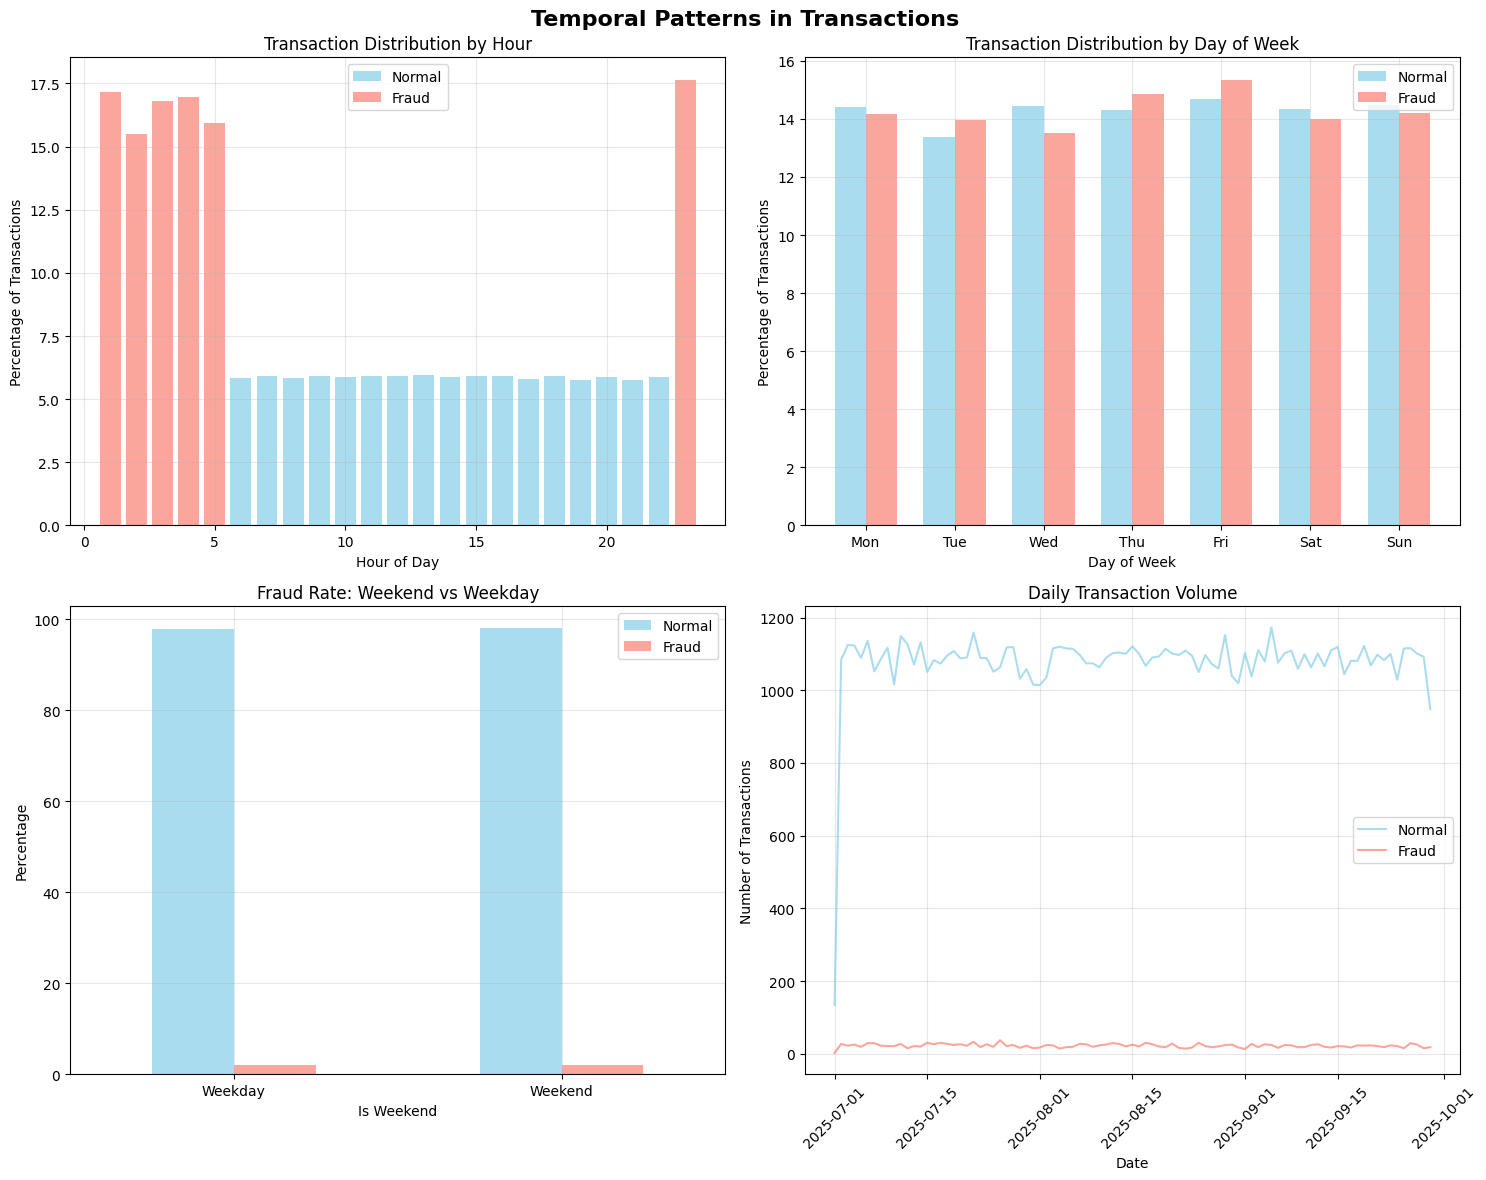

TIME Temporal Pattern Insights:
   - Peak fraud hour: 23:00 (17.6% of fraud transactions)
   - Peak normal hour: 13:00 (6.0% of normal transactions)
   - Weekend fraud rate: 28.2%
   - Weekend normal rate: 28.8%


In [27]:
# Time pattern visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Temporal Patterns in Transactions', fontsize=16, fontweight='bold')

# 1. Hour of day analysis
ax1 = axes[0, 0]
hour_fraud = fraud_df['hour_of_day'].value_counts().sort_index()
hour_normal = normal_df['hour_of_day'].value_counts().sort_index()

# Normalize to percentages
hour_fraud_pct = hour_fraud / hour_fraud.sum() * 100
hour_normal_pct = hour_normal / hour_normal.sum() * 100

ax1.bar(hour_normal_pct.index, hour_normal_pct.values, alpha=0.7, label='Normal', color='skyblue')
ax1.bar(hour_fraud_pct.index, hour_fraud_pct.values, alpha=0.7, label='Fraud', color='salmon')
ax1.set_xlabel('Hour of Day')
ax1.set_ylabel('Percentage of Transactions')
ax1.set_title('Transaction Distribution by Hour')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Day of week analysis
ax2 = axes[0, 1]
day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
day_fraud = fraud_df['day_of_week'].value_counts().sort_index()
day_normal = normal_df['day_of_week'].value_counts().sort_index()

day_fraud_pct = day_fraud / day_fraud.sum() * 100
day_normal_pct = day_normal / day_normal.sum() * 100

x = np.arange(len(day_names))
width = 0.35

ax2.bar(x - width/2, day_normal_pct.values, width, label='Normal', color='skyblue', alpha=0.7)
ax2.bar(x + width/2, day_fraud_pct.values, width, label='Fraud', color='salmon', alpha=0.7)
ax2.set_xlabel('Day of Week')
ax2.set_ylabel('Percentage of Transactions')
ax2.set_title('Transaction Distribution by Day of Week')
ax2.set_xticks(x)
ax2.set_xticklabels(day_names)
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Weekend vs Weekday
ax3 = axes[1, 0]
weekend_data = df.groupby(['is_weekend', 'is_fraud']).size().unstack(fill_value=0)
weekend_pct = weekend_data.div(weekend_data.sum(axis=1), axis=0) * 100

weekend_pct.plot(kind='bar', ax=ax3, color=['skyblue', 'salmon'], alpha=0.7)
ax3.set_xlabel('Is Weekend')
ax3.set_ylabel('Percentage')
ax3.set_title('Fraud Rate: Weekend vs Weekday')
ax3.set_xticklabels(['Weekday', 'Weekend'], rotation=0)
ax3.legend(['Normal', 'Fraud'])
ax3.grid(True, alpha=0.3)

# 4. Transactions over time (daily)
ax4 = axes[1, 1]
df['date'] = df['timestamp'].dt.date
daily_counts = df.groupby(['date', 'is_fraud']).size().unstack(fill_value=0)

daily_counts[False].plot(ax=ax4, label='Normal', color='skyblue', alpha=0.7)
daily_counts[True].plot(ax=ax4, label='Fraud', color='salmon', alpha=0.7)
ax4.set_xlabel('Date')
ax4.set_ylabel('Number of Transactions')
ax4.set_title('Daily Transaction Volume')
ax4.legend()
ax4.grid(True, alpha=0.3)
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Print temporal insights
print("TIME Temporal Pattern Insights:")
peak_fraud_hour = hour_fraud_pct.idxmax()
peak_normal_hour = hour_normal_pct.idxmax()
print(f"   - Peak fraud hour: {peak_fraud_hour:02d}:00 ({hour_fraud_pct[peak_fraud_hour]:.1f}% of fraud transactions)")
print(f"   - Peak normal hour: {peak_normal_hour:02d}:00 ({hour_normal_pct[peak_normal_hour]:.1f}% of normal transactions)")

fraud_weekend_rate = fraud_df['is_weekend'].mean()
normal_weekend_rate = normal_df['is_weekend'].mean()
print(f"   - Weekend fraud rate: {fraud_weekend_rate:.1%}")
print(f"   - Weekend normal rate: {normal_weekend_rate:.1%}")

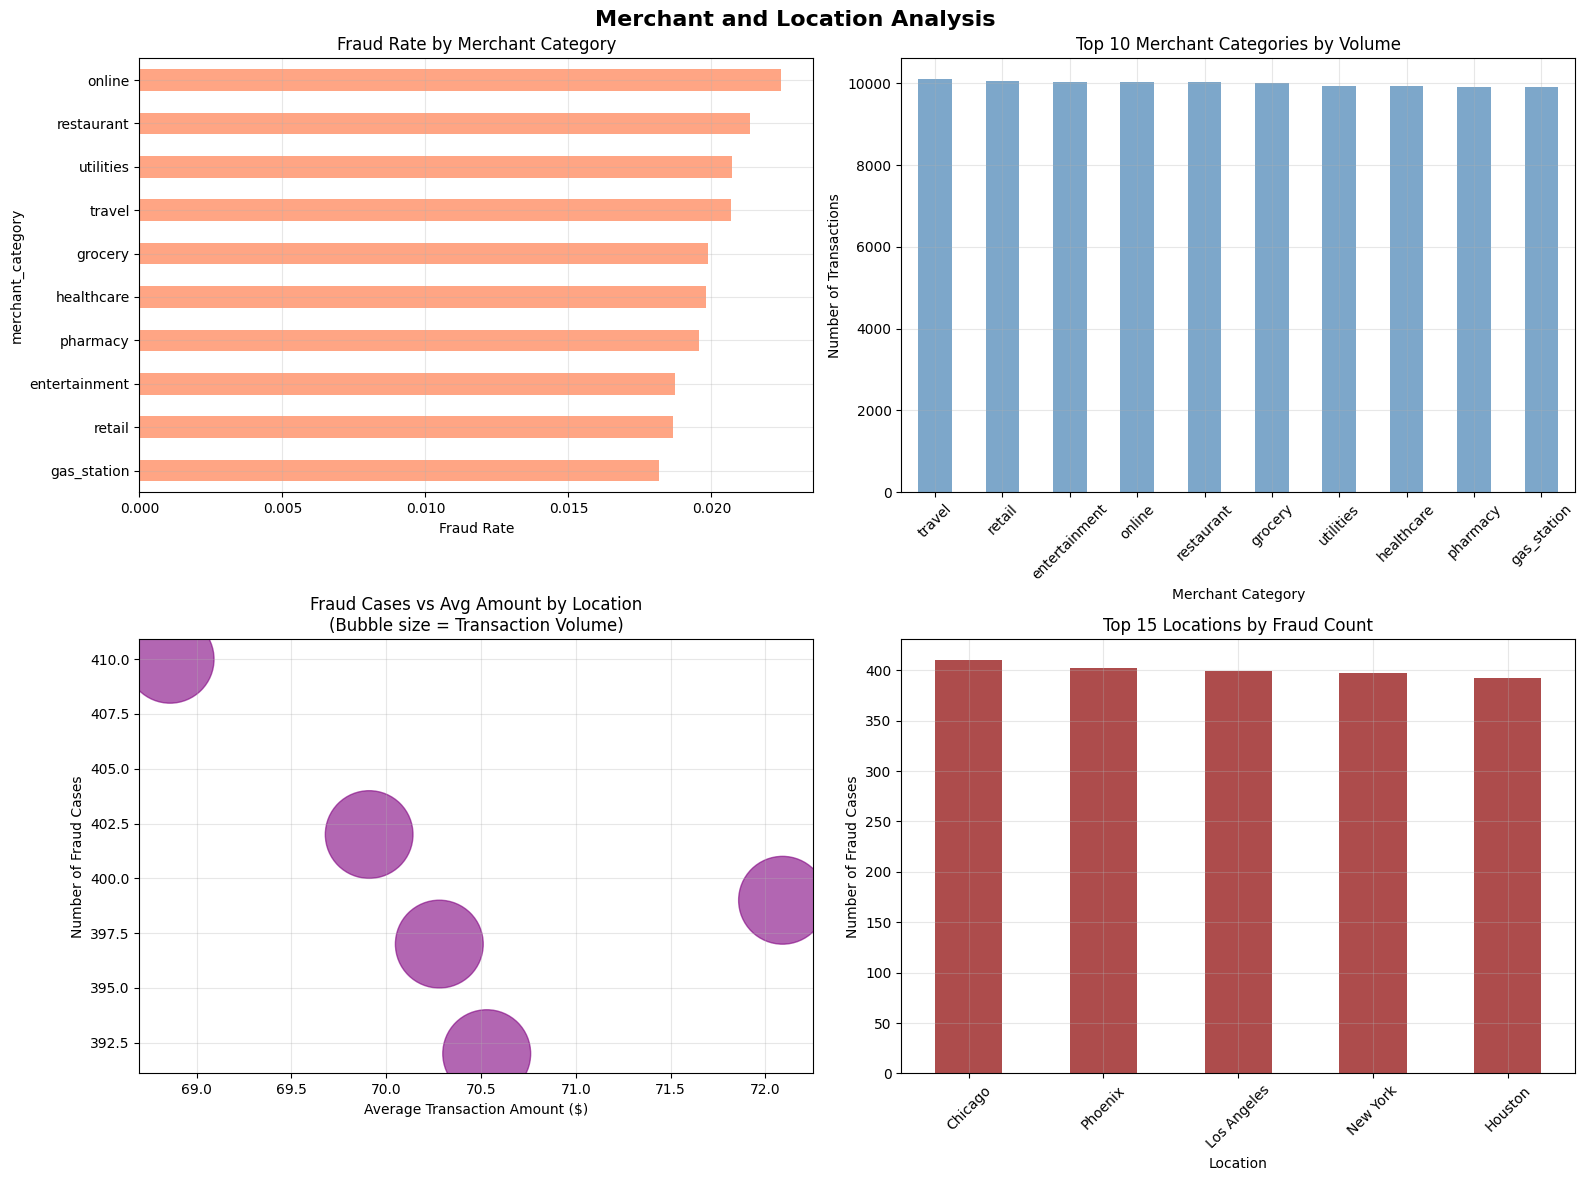

STORE Merchant & Location Insights:
   - Highest fraud rate merchant: online (2.24%)
   - Most active merchant category: travel (10,109 transactions)
   - Location with most fraud: Chicago (410 cases)
   - Number of locations analyzed: 5
   - Number of merchant categories: 10


In [28]:
# Merchant and Location Analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Merchant and Location Analysis', fontsize=16, fontweight='bold')

# 1. Top merchant categories by fraud rate
ax1 = axes[0, 0]
merchant_fraud_rate = df.groupby('merchant_category').agg({
    'is_fraud': ['sum', 'count']
}).round(3)
merchant_fraud_rate.columns = ['fraud_count', 'total_count']
merchant_fraud_rate['fraud_rate'] = merchant_fraud_rate['fraud_count'] / merchant_fraud_rate['total_count']
merchant_fraud_rate = merchant_fraud_rate.sort_values('fraud_rate', ascending=True)

# Only show categories with at least 50 transactions
significant_merchants = merchant_fraud_rate[merchant_fraud_rate['total_count'] >= 50]
significant_merchants['fraud_rate'].plot(kind='barh', ax=ax1, color='coral', alpha=0.7)
ax1.set_xlabel('Fraud Rate')
ax1.set_title('Fraud Rate by Merchant Category')
ax1.grid(True, alpha=0.3)

# 2. Transaction volume by merchant category
ax2 = axes[0, 1]
merchant_volume = df.groupby('merchant_category').agg({
    'amount': 'sum',
    'transaction_id': 'count'
}).round(2)
merchant_volume.columns = ['total_amount', 'transaction_count']
merchant_volume = merchant_volume.sort_values('transaction_count', ascending=False).head(10)

merchant_volume['transaction_count'].plot(kind='bar', ax=ax2, color='steelblue', alpha=0.7)
ax2.set_xlabel('Merchant Category')
ax2.set_ylabel('Number of Transactions')
ax2.set_title('Top 10 Merchant Categories by Volume')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3)

# 3. Average transaction amount by location
ax3 = axes[1, 0]
location_stats = df.groupby('location').agg({
    'amount': ['mean', 'count'],
    'is_fraud': 'sum'
}).round(2)
location_stats.columns = ['avg_amount', 'transaction_count', 'fraud_count']
location_stats = location_stats[location_stats['transaction_count'] >= 50]  # Locations with enough data

# Create scatter plot: avg amount vs fraud count
scatter = ax3.scatter(location_stats['avg_amount'], location_stats['fraud_count'], 
                     s=location_stats['transaction_count']/5, alpha=0.6, c='purple')
ax3.set_xlabel('Average Transaction Amount ($)')
ax3.set_ylabel('Number of Fraud Cases')
ax3.set_title('Fraud Cases vs Avg Amount by Location\n(Bubble size = Transaction Volume)')
ax3.grid(True, alpha=0.3)

# 4. Top locations by fraud distribution
ax4 = axes[1, 1]
location_fraud = df.groupby('location').agg({
    'is_fraud': ['sum', 'count']
}).round(3)
location_fraud.columns = ['fraud_count', 'total_count']
location_fraud['fraud_rate'] = location_fraud['fraud_count'] / location_fraud['total_count']
location_fraud = location_fraud.sort_values('fraud_count', ascending=False).head(15)

location_fraud['fraud_count'].plot(kind='bar', ax=ax4, color='darkred', alpha=0.7)
ax4.set_xlabel('Location')
ax4.set_ylabel('Number of Fraud Cases')
ax4.set_title('Top 15 Locations by Fraud Count')
ax4.tick_params(axis='x', rotation=45)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print insights
print("STORE Merchant & Location Insights:")
highest_fraud_merchant = significant_merchants['fraud_rate'].idxmax()
print(f"   - Highest fraud rate merchant: {highest_fraud_merchant} ({significant_merchants.loc[highest_fraud_merchant, 'fraud_rate']:.2%})")

most_active_merchant = merchant_volume.index[0]
print(f"   - Most active merchant category: {most_active_merchant} ({merchant_volume.loc[most_active_merchant, 'transaction_count']:,} transactions)")

top_fraud_location = location_fraud.index[0]
print(f"   - Location with most fraud: {top_fraud_location} ({location_fraud.loc[top_fraud_location, 'fraud_count']} cases)")

print(f"   - Number of locations analyzed: {len(location_stats)}")
print(f"   - Number of merchant categories: {df['merchant_category'].nunique()}")

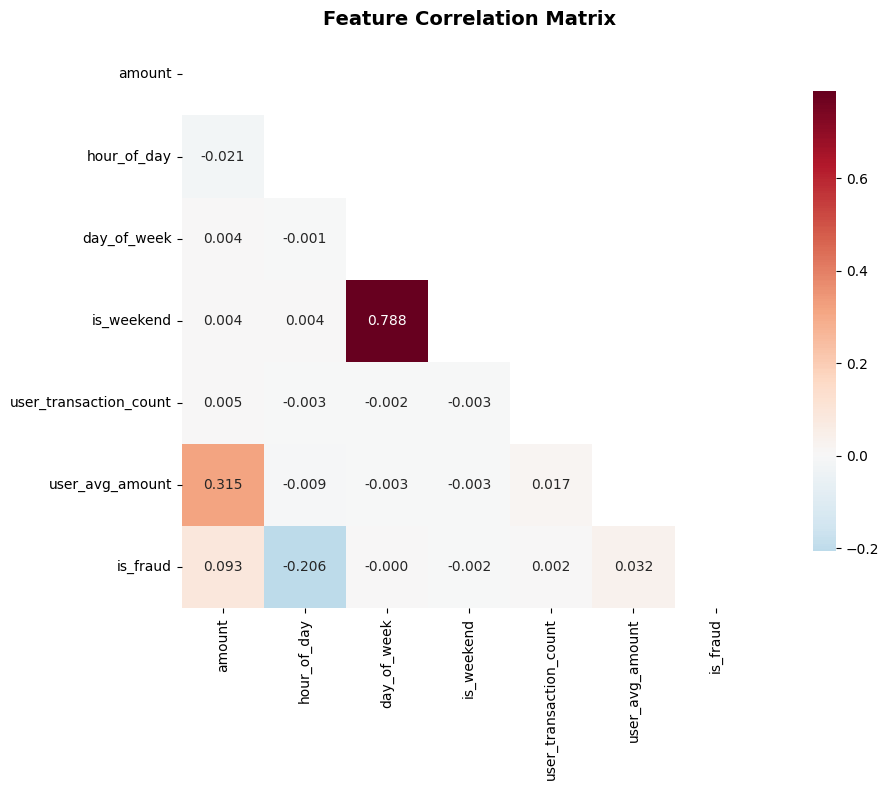

Feature Engineering Preview:
Original dataset shape: (1000, 21)
Original columns: ['transaction_id', 'user_id', 'timestamp', 'amount', 'merchant_category', 'transaction_type', 'device_id', 'device_type', 'location', 'hour_of_day', 'day_of_week', 'is_weekend', 'is_fraud', 'user_transaction_count', 'user_avg_amount', 'user_std_amount', 'user_unique_categories', 'user_unique_devices', 'user_unique_locations', 'amount_zscore', 'date']

After feature engineering:
Enhanced dataset shape: (1000, 27)
New features added: 6

New Feature Categories:

Temporal Features (3):
   - hour_sin: [ 0.96592583  0.8660254  -1.        ]
   - hour_cos: [-2.58819045e-01 -5.00000000e-01 -1.83697020e-16]
   - is_business_hours: [False False False]

Amount Features (3):
   - log_amount: [1.5260563  3.35480434 4.39777694]
   - amount_round: [0 0 0]
   - amount_vs_user_avg: [0.06411741 0.38050988 0.6505992 ]

User Behavior Features (1):
   - amount_vs_user_avg: [0.06411741 0.38050988 0.6505992 ]


In [29]:
# Create a subset of numerical features for correlation analysis
numerical_cols = ['amount', 'hour_of_day', 'day_of_week', 'is_weekend', 'user_transaction_count', 'user_avg_amount', 'is_fraud']
correlation_matrix = df[numerical_cols].corr()

# Create correlation heatmap
plt.figure(figsize=(12, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            square=True,
            fmt='.3f',
            cbar_kws={"shrink": .8})
plt.title('Feature Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Preview feature engineering with basic features
print("Feature Engineering Preview:")
print("=" * 50)

# Create a sample of data for feature engineering demo
sample_df = df.sample(n=1000, random_state=42).copy()

print(f"Original dataset shape: {sample_df.shape}")
print(f"Original columns: {list(sample_df.columns)}")

# Create some basic engineered features
enhanced_df = sample_df.copy()

# Temporal features
enhanced_df['hour_sin'] = np.sin(2 * np.pi * enhanced_df['hour_of_day'] / 24)
enhanced_df['hour_cos'] = np.cos(2 * np.pi * enhanced_df['hour_of_day'] / 24)
enhanced_df['is_business_hours'] = enhanced_df['hour_of_day'].between(9, 17)

# Amount features
enhanced_df['log_amount'] = np.log1p(enhanced_df['amount'])
enhanced_df['amount_round'] = (enhanced_df['amount'] % 1 == 0).astype(int)

# User behavior features
enhanced_df['amount_vs_user_avg'] = enhanced_df['amount'] / enhanced_df['user_avg_amount']

print(f"\nAfter feature engineering:")
print(f"Enhanced dataset shape: {enhanced_df.shape}")
print(f"New features added: {enhanced_df.shape[1] - sample_df.shape[1]}")

# Show new feature categories
new_features = [col for col in enhanced_df.columns if col not in sample_df.columns]
feature_categories = {
    'Temporal': [f for f in new_features if any(time_word in f for time_word in ['hour', 'business'])],
    'Amount': [f for f in new_features if any(amt_word in f for amt_word in ['amount', 'log', 'round'])],
    'User Behavior': [f for f in new_features if any(user_word in f for user_word in ['user', 'avg', 'vs'])]
}

print("\nNew Feature Categories:")
for category, features in feature_categories.items():
    if features:
        print(f"\n{category} Features ({len(features)}):")
        for feature in features:
            sample_values = enhanced_df[feature].dropna().head(3).values
            print(f"   - {feature}: {sample_values}")

# Show correlation with fraud for new features

In [30]:
# Create data directory if it doesn't exist
import os
import json
data_dir = os.path.join(os.path.dirname(os.getcwd()), 'data')
os.makedirs(data_dir, exist_ok=True)

# Export the raw dataset
df.to_csv(os.path.join(data_dir, 'transactions_raw.csv'), index=False)
print(f"Raw dataset exported to: {os.path.join(data_dir, 'transactions_raw.csv')}")

# Export the feature engineered dataset produced by the pipeline
features_df.to_csv(os.path.join(data_dir, 'transactions_processed.csv'), index=False)
print(f"Processed dataset exported to: {os.path.join(data_dir, 'transactions_processed.csv')}")

summary_stats = {
    'Dataset Info': {
        'Total Transactions': len(df),
        'Fraud Transactions': int(df['is_fraud'].sum()),
        'Normal Transactions': int((~df['is_fraud']).sum()),
        'Fraud Rate': f"{df['is_fraud'].mean():.2%}",
        'Date Range': f"{df['timestamp'].min().date()} to {df['timestamp'].max().date()}",
        'Unique Users': df['user_id'].nunique(),
        'Unique Merchants': df['merchant_category'].nunique(),
        'Locations': df['location'].nunique(),
        'Device Types': df['device_type'].nunique()
    },
    'Amount Statistics': {
        'Average Transaction': f"${df['amount'].mean():.2f}",
        'Median Transaction': f"${df['amount'].median():.2f}",
        'Max Transaction': f"${df['amount'].max():.2f}",
        'Average Fraud Amount': f"${df[df['is_fraud']]['amount'].mean():.2f}",
        'Average Normal Amount': f"${df[~df['is_fraud']]['amount'].mean():.2f}",
        'Total Volume': f"${df['amount'].sum():,.2f}"
    },
    'Feature Engineering': {
        'Feature Count': len(features_df.columns),
        'Target Column': config['features']['target_column'],
        'Feature List Preview': data_outputs['feature_names'][:5]
    }
}

config_summary = {
    'data_generation': {
        'n_transactions': config['data']['n_samples'],
        'fraud_rate': config['data']['fraud_rate'],
        'random_seed': config['data']['random_state']
    },
    'processing_timestamp': pd.Timestamp.now().isoformat()
}

with open(os.path.join(data_dir, 'processing_config.json'), 'w') as f:
    json.dump(config_summary, f, indent=2)

with open(os.path.join(data_dir, 'training_summary_report.json'), 'w') as f:
    json.dump(summary_stats, f, indent=2)

print("Processing configuration saved.")


Raw dataset exported to: /home/developer/proyectos/mlops_template/data/transactions_raw.csv
Processed dataset exported to: /home/developer/proyectos/mlops_template/data/transactions_processed.csv
Processing configuration saved.
